Selected Ads: ['A', 'C', 'E']
Total Revenue: 142


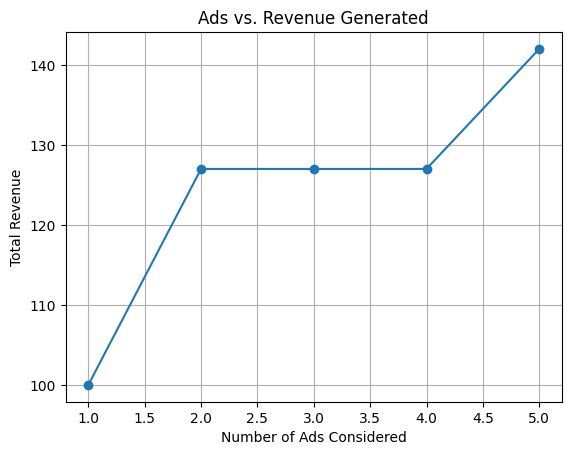

In [1]:

import matplotlib.pyplot as plt

# Function to schedule ads using Greedy Job Sequencing
def schedule_ads(ads):
    # Sort ads by profit (high → low)
    ads.sort(key=lambda x: x[2], reverse=True)

    # Find max deadline
    max_deadline = max(ad[1] for ad in ads)
    slots = [None] * (max_deadline + 1)  # index 0 unused

    total_profit = 0
    scheduled_ads = []

    # Greedy scheduling
    for ad in ads:
        ad_id, deadline, profit = ad
        for t in range(deadline, 0, -1):
            if slots[t] is None:   # Free slot
                slots[t] = ad_id
                scheduled_ads.append(ad_id)
                total_profit += profit
                break

    return scheduled_ads, total_profit

# Example input
ads = [
    ("A", 2, 100),
    ("B", 1, 19),
    ("C", 2, 27),
    ("D", 1, 25),
    ("E", 3, 15)
]

# Run scheduling
result, revenue = schedule_ads(ads)
print("Selected Ads:", result)
print("Total Revenue:", revenue)

# Visualization: Ads vs Revenue
ads_count = [i for i in range(1, len(ads)+1)]
revenues = []

for k in range(1, len(ads)+1):
    selected, revenue = schedule_ads(ads[:k])
    revenues.append(revenue)

plt.plot(ads_count, revenues, marker='o')
plt.xlabel("Number of Ads Considered")
plt.ylabel("Total Revenue")
plt.title("Ads vs. Revenue Generated")
plt.grid(True)
plt.show()


Maximum Profit within budget: 7
Selected Projects (indices): [0, 1]


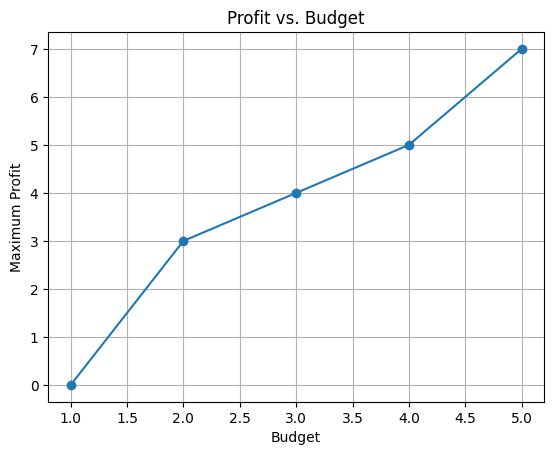

In [2]:

import matplotlib.pyplot as plt


def knapsack(costs, profits, budget):
    n = len(profits)
    dp = [[0] * (budget + 1) for _ in range(n + 1)]


    for i in range(1, n + 1):
        for w in range(1, budget + 1):
            if costs[i-1] <= w:
                dp[i][w] = max(dp[i-1][w], profits[i-1] + dp[i-1][w-costs[i-1]])
            else:
                dp[i][w] = dp[i-1][w]


    chosen_items = []
    w = budget
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i-1][w]:
            chosen_items.append(i-1)
            w -= costs[i-1]

    chosen_items.reverse()
    return dp[n][budget], chosen_items


costs = [2, 3, 4, 5]
profits = [3, 4, 5, 6]
budget = 5


max_profit, selected_items = knapsack(costs, profits, budget)
print("Maximum Profit within budget:", max_profit)
print("Selected Projects (indices):", selected_items)


budgets = list(range(1, budget + 1))
profits_vs_budget = [knapsack(costs, profits, b)[0] for b in budgets]

plt.plot(budgets, profits_vs_budget, marker='o')
plt.xlabel("Budget")
plt.ylabel("Maximum Profit")
plt.title("Profit vs. Budget")
plt.grid(True)
plt.show()



In [3]:




def print_grid(grid):
    for row in grid:
        print(" ".join(str(num) if num != 0 else "." for num in row))


def is_valid(grid, row, col, num):

    if num in grid[row]:
        return False


    if num in [grid[i][col] for i in range(9)]:
        return False


    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(start_row, start_row + 3):
        for j in range(start_col, start_col + 3):
            if grid[i][j] == num:
                return False
    return True


def solve_sudoku(grid):
    for row in range(9):
        for col in range(9):
            if grid[row][col] == 0:
                for num in range(1, 10):
                    if is_valid(grid, row, col, num):
                        grid[row][col] = num
                        if solve_sudoku(grid):
                            return True
                        grid[row][col] = 0
                return False
    return True




def print_grid(grid):
    for row in grid:
        print(" ".join(str(num) if num != 0 else "." for num in row))


def is_valid(grid, row, col, num):

    if num in grid[row]:
        return False


    if num in [grid[i][col] for i in range(9)]:
        return False


    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(start_row, start_row + 3):
        for j in range(start_col, start_col + 3):
            if grid[i][j] == num:
                return False
    return True


def solve_sudoku(grid):
    for row in range(9):
        for col in range(9):
            if grid[row][col] == 0:
                for num in range(1, 10):
                    if is_valid(grid, row, col, num):
                        grid[row][col] = num
                        if solve_sudoku(grid):
                            return True
                        grid[row][col] = 0
                return False
    return True


sudoku_grid = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

print("Sudoku Puzzle (Input):")
print_grid(sudoku_grid)

if solve_sudoku(sudoku_grid):
    print("\nSudoku Puzzle (Solved):")
    print_grid(sudoku_grid)
else:
    print("No solution exists")

sudoku_grid = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

print("Sudoku Puzzle (Input):")
print_grid(sudoku_grid)

if solve_sudoku(sudoku_grid):
    print("\nSudoku Puzzle (Solved):")
    print_grid(sudoku_grid)
else:
    print("No solution exists")

Sudoku Puzzle (Input):
5 3 . . 7 . . . .
6 . . 1 9 5 . . .
. 9 8 . . . . 6 .
8 . . . 6 . . . 3
4 . . 8 . 3 . . 1
7 . . . 2 . . . 6
. 6 . . . . 2 8 .
. . . 4 1 9 . . 5
. . . . 8 . . 7 9

Sudoku Puzzle (Solved):
5 3 4 6 7 8 9 1 2
6 7 2 1 9 5 3 4 8
1 9 8 3 4 2 5 6 7
8 5 9 7 6 1 4 2 3
4 2 6 8 5 3 7 9 1
7 1 3 9 2 4 8 5 6
9 6 1 5 3 7 2 8 4
2 8 7 4 1 9 6 3 5
3 4 5 2 8 6 1 7 9
Sudoku Puzzle (Input):
5 3 . . 7 . . . .
6 . . 1 9 5 . . .
. 9 8 . . . . 6 .
8 . . . 6 . . . 3
4 . . 8 . 3 . . 1
7 . . . 2 . . . 6
. 6 . . . . 2 8 .
. . . 4 1 9 . . 5
. . . . 8 . . 7 9

Sudoku Puzzle (Solved):
5 3 4 6 7 8 9 1 2
6 7 2 1 9 5 3 4 8
1 9 8 3 4 2 5 6 7
8 5 9 7 6 1 4 2 3
4 2 6 8 5 3 7 9 1
7 1 3 9 2 4 8 5 6
9 6 1 5 3 7 2 8 4
2 8 7 4 1 9 6 3 5
3 4 5 2 8 6 1 7 9


Charset length: 5; max length: 4
Proceeding only for educational purposes on passwords you own.

Match found: 'a1b' after 47 attempts in 0.0000 seconds.
Total attempts until found: 47. Total time: 0.0000s

Result summary: {'found': True, 'attempts': 47, 'found_attempts': 47, 'time_seconds': 3.4332275390625e-05}
Length 1: enumerated 5 combos in 0.000003 s
Length 2: enumerated 25 combos in 0.000003 s
Length 3: enumerated 125 combos in 0.000010 s
Length 4: enumerated 625 combos in 0.000055 s


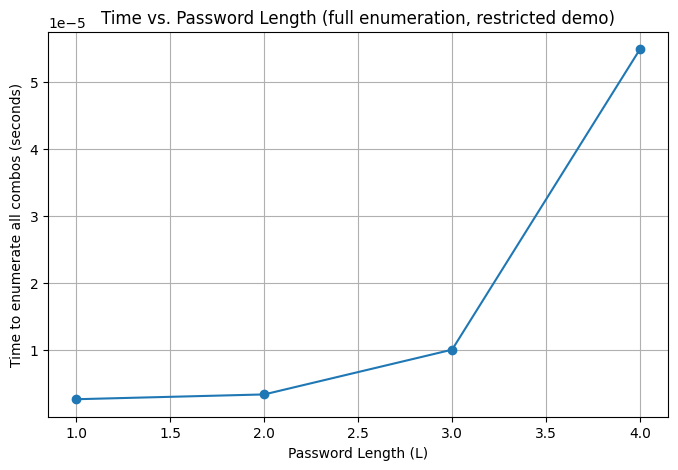

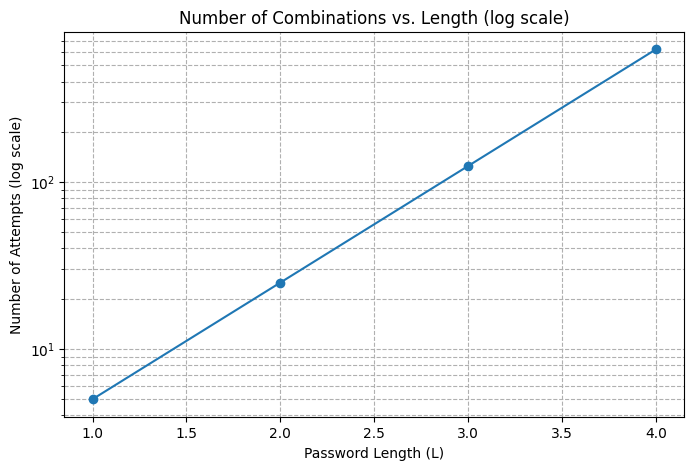

In [4]:


"""
Safe educational demo: Naive brute-force (restricted)
- Demonstrates concept with itertools.product
- STRICT LIMITS: charset size <= 6, max_length <= 5
- Intended only for local demos on passwords you own.
"""

import itertools
import time
import matplotlib.pyplot as plt

def safe_bruteforce_demo(target, charset, max_len=4):

    if not isinstance(target, str):
        raise ValueError("Target must be a string.")
    if len(charset) == 0:
        raise ValueError("Charset cannot be empty.")
    if len(charset) > 6:
        raise ValueError("Charset too large for safe demo (limit 6).")
    if max_len < 1 or max_len > 5:
        raise ValueError("max_len must be between 1 and 5 (inclusive) for safe demo.")
    if len(target) > max_len:
        raise ValueError(f"Target length ({len(target)}) exceeds max_len ({max_len}).")

    print("WARNING: This demo is restricted to small search spaces for safety.")
    print(f"Charset length: {len(charset)}; max length: {max_len}")
    print("Proceeding only for educational purposes on passwords you own.\n")

    total_attempts = 0
    found = False
    found_attempts = None
    found_time = None

    start_time = time.time()


    for length in range(1, max_len + 1):

        for tup in itertools.product(charset, repeat=length):
            attempt = "".join(tup)
            total_attempts += 1

            if attempt == target:
                found = True
                found_attempts = total_attempts
                found_time = time.time() - start_time
                print(f"Match found: '{attempt}' after {found_attempts} attempts in {found_time:.4f} seconds.")
                break

        if found:
            break

    end_time = time.time()
    elapsed = end_time - start_time

    if not found:
        print(f"No match found (searched up to length {max_len}). Total attempts: {total_attempts}. Time: {elapsed:.4f}s")
    else:
        print(f"Total attempts until found: {found_attempts}. Total time: {elapsed:.4f}s")

    return {
        "found": found,
        "attempts": total_attempts,
        "found_attempts": found_attempts,
        "time_seconds": elapsed
    }


def time_vs_length_plot(charset, target_prefix="", max_len=4):
    """
    Measures time taken (and attempts) to exhaustively search all strings
    of length L (for L=1..max_len) using the restricted charset, and plots result.
    Note: We don't need to search for a real password here — we'll measure
    full-space enumeration time per length.
    """
    if len(charset) > 6 or max_len > 5:
        raise ValueError("Limits exceeded for safe plotting (charset<=6, max_len<=5).")

    lengths = list(range(1, max_len + 1))
    times = []
    attempts = []

    for L in lengths:
        start = time.time()
        count = 0

        for _ in itertools.product(charset, repeat=L):
            count += 1
        t = time.time() - start
        times.append(t)
        attempts.append(count)
        print(f"Length {L:>1}: enumerated {count} combos in {t:.6f} s")


    plt.figure(figsize=(8,5))
    plt.plot(lengths, times, marker='o')
    plt.xlabel("Password Length (L)")
    plt.ylabel("Time to enumerate all combos (seconds)")
    plt.title("Time vs. Password Length (full enumeration, restricted demo)")
    plt.grid(True)
    plt.show()


    plt.figure(figsize=(8,5))
    plt.plot(lengths, attempts, marker='o')
    plt.yscale('log')
    plt.xlabel("Password Length (L)")
    plt.ylabel("Number of Attempts (log scale)")
    plt.title("Number of Combinations vs. Length (log scale)")
    plt.grid(True, which="both", ls="--")
    plt.show()



if __name__ == "__main__":

    demo_charset = "abc12"
    demo_target = "a1b"
    max_len_demo = 4

    res = safe_bruteforce_demo(demo_target, demo_charset, max_len=max_len_demo)
    print("\nResult summary:", res)


    time_vs_length_plot(demo_charset, max_len=4)